
> **Note**: I worked with the _movie dataset_. This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. I renamed the dataset as "movies_db.csv".


# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The movie dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including columns: 
 1   id:                    movie id, unique to individual movie
 2   imdb_id:               movie id provided by the imdb database, unique to individual movie 
 3   popularity:            popularity of the movie described in figures
 4   budget:                budget proposed for the movie making 
 5   revenue:               revenue generated from selling the movie 
 6   original_title:        title given to the movie
 7   cast:                  list of movie actors and actresses 
 8   homepage:              movie homepage
 9   director:              director of the movie
 10  tagline:               movie tagline
 11  keywords:              movie keywords (hashtags)
 12  overview:              overview of the movie
 13  runtime:               the length of the film plus the length of the ending credits 
 14  genres:                genre the movie belongs to
 15  production_companies:  company producing the movie
 16  release_date:          date movie was released
 17  vote_count:            count of votes casted for movie 
 18  vote_average:          average of votes casted for movie
 19  release_year:          year movie was released 
 20  budget_adj:            the budget of the associated movie in terms of 2010 dollars, accounting for inflation over time
 21  revenue_adj:           the revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time
 
 + Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters
 + There are some odd characters in the ‘cast’ column
 + The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


### Question(s) for Analysis
> + What is the most popular genre?
> + What is the Distribution of the runtime across all movies?
> + What is the Relationship between vote count and popularity?
> + Does popularity contributes to high vote average?
  
  

In [3]:
# Import all packages needed for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


<a id='wrangling'></a>
## Data Wrangling


Load dataset and explore with pandas built-in functions

In [4]:
df = pd.read_csv('movies_db.csv')

In [5]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning

Drop the columns: cast, tagline, homepage, overview, director, production companies, and keywords. They make our data crowdy, and they contain information not needed for the analysis.

In [9]:
df.drop(columns = ['cast', 'tagline', 'homepage', 'overview', 'keywords', 'imdb_id', 'director', 'release_year', 'production_companies'], axis=1, inplace=True, errors = 'ignore')

Check to confirm if the columns have been dropped

In [10]:
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,1.747999e+08,1.385749e+09


Check the rows with zeroes: Some columns minimum is zero according to df.info()

In [11]:
df[df['budget']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5696 entries, 30 to 10864
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              5696 non-null   int64  
 1   popularity      5696 non-null   float64
 2   budget          5696 non-null   int64  
 3   revenue         5696 non-null   int64  
 4   original_title  5696 non-null   object 
 5   runtime         5696 non-null   int64  
 6   genres          5674 non-null   object 
 7   release_date    5696 non-null   object 
 8   vote_count      5696 non-null   int64  
 9   vote_average    5696 non-null   float64
 10  budget_adj      5696 non-null   float64
 11  revenue_adj     5696 non-null   float64
dtypes: float64(4), int64(5), object(3)
memory usage: 578.5+ KB


In [12]:
df[df['revenue']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 48 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              6016 non-null   int64  
 1   popularity      6016 non-null   float64
 2   budget          6016 non-null   int64  
 3   revenue         6016 non-null   int64  
 4   original_title  6016 non-null   object 
 5   runtime         6016 non-null   int64  
 6   genres          5993 non-null   object 
 7   release_date    6016 non-null   object 
 8   vote_count      6016 non-null   int64  
 9   vote_average    6016 non-null   float64
 10  budget_adj      6016 non-null   float64
 11  revenue_adj     6016 non-null   float64
dtypes: float64(4), int64(5), object(3)
memory usage: 611.0+ KB


In [13]:
df[df['runtime']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 92 to 8874
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              31 non-null     int64  
 1   popularity      31 non-null     float64
 2   budget          31 non-null     int64  
 3   revenue         31 non-null     int64  
 4   original_title  31 non-null     object 
 5   runtime         31 non-null     int64  
 6   genres          30 non-null     object 
 7   release_date    31 non-null     object 
 8   vote_count      31 non-null     int64  
 9   vote_average    31 non-null     float64
 10  budget_adj      31 non-null     float64
 11  revenue_adj     31 non-null     float64
dtypes: float64(4), int64(5), object(3)
memory usage: 3.1+ KB


In [14]:
df[df['budget_adj']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5696 entries, 30 to 10864
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              5696 non-null   int64  
 1   popularity      5696 non-null   float64
 2   budget          5696 non-null   int64  
 3   revenue         5696 non-null   int64  
 4   original_title  5696 non-null   object 
 5   runtime         5696 non-null   int64  
 6   genres          5674 non-null   object 
 7   release_date    5696 non-null   object 
 8   vote_count      5696 non-null   int64  
 9   vote_average    5696 non-null   float64
 10  budget_adj      5696 non-null   float64
 11  revenue_adj     5696 non-null   float64
dtypes: float64(4), int64(5), object(3)
memory usage: 578.5+ KB


In [15]:
df[df['revenue_adj']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 48 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              6016 non-null   int64  
 1   popularity      6016 non-null   float64
 2   budget          6016 non-null   int64  
 3   revenue         6016 non-null   int64  
 4   original_title  6016 non-null   object 
 5   runtime         6016 non-null   int64  
 6   genres          5993 non-null   object 
 7   release_date    6016 non-null   object 
 8   vote_count      6016 non-null   int64  
 9   vote_average    6016 non-null   float64
 10  budget_adj      6016 non-null   float64
 11  revenue_adj     6016 non-null   float64
dtypes: float64(4), int64(5), object(3)
memory usage: 611.0+ KB


_Data collection for revenue_adj, budget_adj, revenue, budget was stopped at an early point, more than half of the dataset have no values for these columns. To avoid bias and misrepresentation of data, drop these columns._

In [16]:
df.drop(columns=['revenue', 'revenue_adj', 'budget', 'budget_adj'], axis=1, inplace=True, errors = 'ignore')

In [17]:
# check if they have been dropped

df.head()

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3
3,140607,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5
4,168259,9.335014,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3


In [18]:
# The runtime column has some zero values, drop those rows.

df.drop(df[df['runtime'] == 0].index, inplace = True)

In [19]:
# check if they have been dropped 

df.describe()

,id,popularity,runtime,vote_count,vote_average
count,10835.000000,10835.000000,10835.000000,10835.000000,10835.000000
mean,65747.954776,0.647757,102.362898,217.952100,5.976253
std,91816.027384,1.001158,30.946957,576.345266,0.935051
min,5.000000,0.000065,2.000000,10.000000,1.500000
25%,10586.500000,0.208561,90.000000,17.000000,5.400000
50%,20556.000000,0.384763,99.000000,38.000000,6.000000
75%,75036.000000,0.715444,112.000000,146.000000,6.600000
max,417859.000000,32.985763,900.000000,9767.000000,9.200000


In [20]:
# check for duplicate rows

sum(df.duplicated())

1

In [21]:
# Drop the duplicates

df.drop_duplicates(inplace=True)

In [22]:
# check if it has been dropped

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10834 non-null  int64  
 1   popularity      10834 non-null  float64
 2   original_title  10834 non-null  object 
 3   runtime         10834 non-null  int64  
 4   genres          10812 non-null  object 
 5   release_date    10834 non-null  object 
 6   vote_count      10834 non-null  int64  
 7   vote_average    10834 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 761.8+ KB


The imdb_id, genres, director, production_companies columns have some null values, drop them.

In [23]:
df.dropna(inplace=True)

In [24]:
# check if they have been dropped

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10812 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10812 non-null  int64  
 1   popularity      10812 non-null  float64
 2   original_title  10812 non-null  object 
 3   runtime         10812 non-null  int64  
 4   genres          10812 non-null  object 
 5   release_date    10812 non-null  object 
 6   vote_count      10812 non-null  int64  
 7   vote_average    10812 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 760.2+ KB


In [25]:
# Format the release date to pandas date_time format. The date-time object is easier to work with.

df['release_date'] = pd.to_datetime(df['release_date'])

Create a column for broad categories of genres. This is to reduce bulkiness in the analysis. The genres are not uniform because tthey are based on user inputs. 

In [26]:
# First check the number of unique values.

df['genres'].nunique()

2036

Now group according to the first word in the genre column

In [27]:
df['categories'] = df.apply(lambda row: row.genres.split('|')[0], axis=1)

In [28]:
# check to see if change has been made

df

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,categories
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,Action
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,Action
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,Adventure
3,140607,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,Action
4,168259,9.335014,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,Action
...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,The Endless Summer,95,Documentary,2066-06-15,11,7.4,Documentary
10862,20379,0.065543,Grand Prix,176,Action|Adventure|Drama,2066-12-21,20,5.7,Action
10863,39768,0.065141,Beregis Avtomobilya,94,Mystery|Comedy,2066-01-01,11,6.5,Mystery
10864,21449,0.064317,"What's Up, Tiger Lily?",80,Action|Comedy,2066-11-02,22,5.4,Action


In [29]:
# check value counts 

df['categories'].value_counts()

Drama              2448
Comedy             2313
Action             1589
Horror              910
Adventure           586
Thriller            489
Documentary         430
Animation           403
Crime               380
Fantasy             271
Science Fiction     214
Romance             182
Family              143
Mystery             125
Music                99
TV Movie             76
War                  59
History              44
Western              42
Foreign               9
Name: categories, dtype: int64

Inspect data again to check all changes

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10812 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10812 non-null  int64         
 1   popularity      10812 non-null  float64       
 2   original_title  10812 non-null  object        
 3   runtime         10812 non-null  int64         
 4   genres          10812 non-null  object        
 5   release_date    10812 non-null  datetime64[ns]
 6   vote_count      10812 non-null  int64         
 7   vote_average    10812 non-null  float64       
 8   categories      10812 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 844.7+ KB


In [31]:
df.head()

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,categories
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,Action
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,Action
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,Adventure
3,140607,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,Action
4,168259,9.335014,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,Action


In [32]:
df.tail(50)

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,categories
10816,16378,0.064602,The Rutles: All You Need Is Cash,76,Comedy,1978-03-22,14,6.0,Comedy
10817,13963,0.064029,The Last Waltz,117,Documentary|Music,1978-05-01,33,8.0,Documentary
10818,39995,0.047645,Long Weekend,92,Horror|Thriller|Mystery,1978-10-14,17,6.1,Horror
10819,16214,0.044675,Hooper,107,Action|Comedy,1978-07-28,13,6.0,Action
10820,13377,1.227582,How the Grinch Stole Christmas!,26,Animation|Family|Comedy,2066-12-18,286,7.1,Animation
10821,1714,0.929393,Fahrenheit 451,112,Drama|Science Fiction,2066-09-06,93,6.8,Drama
10822,396,0.670274,Who's Afraid of Virginia Woolf?,131,Drama,2066-06-21,74,7.5,Drama
10823,3591,0.613444,One Million Years B.C.,100,Action|Adventure|Fantasy,2066-12-30,17,5.6,Action
10824,2525,0.533292,The Bible: In the Beginning...,174,Drama,2066-09-28,18,5.8,Drama
10825,1052,0.509263,Blow-Up,111,Drama|Mystery|Thriller,2066-12-18,103,6.8,Drama


In [33]:
df.describe()

,id,popularity,runtime,vote_count,vote_average
count,10812.000000,10812.000000,10812.000000,10812.000000,10812.000000
mean,65558.945523,0.648730,102.421846,218.369404,5.975379
std,91662.645876,1.001976,30.871363,576.886018,0.934122
min,5.000000,0.000065,2.000000,10.000000,1.500000
25%,10576.750000,0.209045,90.000000,17.000000,5.400000
50%,20500.500000,0.385298,99.000000,38.000000,6.000000
75%,74725.250000,0.716608,112.000000,146.000000,6.600000
max,417859.000000,32.985763,900.000000,9767.000000,9.200000


<a id='eda'></a>
## Exploratory Data Analysis



Most rated movie of all time? Use max() function to get this.

In [34]:
max_av = df['vote_average'].max()

In [35]:
df[df['vote_average']==max_av]

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,categories
3894,125336,0.006925,The Story of Film: An Odyssey,900,Documentary,2011-09-03,14,9.2,Documentary


Movie with the highest vote count?

In [36]:
max_count = df['vote_count'].max()
max_count

9767

In [37]:
df[df['vote_count']==max_count]

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,categories
1919,27205,9.363643,Inception,148,Action|Thriller|Science Fiction|Mystery|Adventure,2010-07-14,9767,7.9,Action


### Research Question 1 (What is the most popular genre?)

In [38]:
# Get the mean popularity per category

popularity_mean = df.groupby('categories').popularity.mean()

In [39]:
# Define a function that plots bar chart.

def plot_bar(x, x_label, y_label, title):
    '''The function takes in the following arguments
    and returns the plot
    x = series of interest to be plotted
    x_label = label for the x axis
    y_label = label for the y axis
    title = title of the plot'''
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plot = x.plot(kind='bar');
    return plot

Call the function to plot the bar graph. The bar chart is appropriate visualization for this data because it is a categorical data.


<AxesSubplot:title={'center':'popularity of genres'}, xlabel='categories', ylabel='popularity mean'>

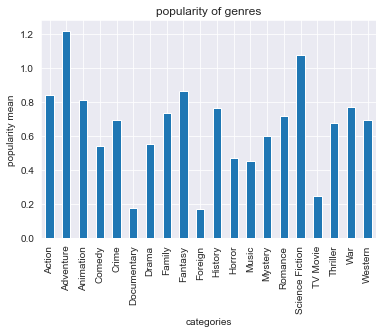

In [40]:
plot_bar(popularity_mean, 'categories', 'popularity mean', 'popularity of genres')

The most popular genre is adventure (tallest bar), followed by science fiction. This analysis is based on the broad categorization by using the first words in the genre column.

### Research Question 2  (What is the Relationship between popularity and high vote average?)

In [41]:
# Define a function that plots scatter plot

def scatter_plotter(x, y, x_label, y_label, title):
    '''This function takes in the following arguments
    and returns the plot
    x = series of interest to be plotted on the x-axis
    y = series of interest to be plotted on the y-axis
    x_label = label for the x axis
    y_label = label for the y axis
    title = title of the plot'''
    plot = df.plot.scatter(x, y);
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    return plot;

Call the function to plot the scatter plot. The scatter plot is the right visualization for this data because it depicts the relationship between the two variables.


<AxesSubplot:title={'center':'Relationship between Popularity and Vote Average'}, xlabel='popularity', ylabel='vote average'>

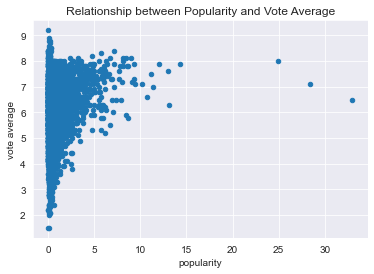

In [42]:
scatter_plotter('popularity', 'vote_average', 'popularity', 'vote average', 'Relationship between Popularity and Vote Average')


This best line of fit for the scatter plot above is a vertical straight line. This means no relationship between popularity and vote average.

### Research Question 3 (What is the Relationship between vote count and popularity?)

Call the scatter_plotter function to plot a scatter plot. The scatter plot is the right visualization for this data because it depicts the relationship between the two variables.

<AxesSubplot:title={'center':'Relationship between Popularity and Vote Count'}, xlabel='popularity', ylabel='vote count'>

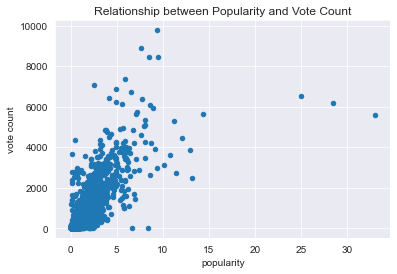

In [43]:
# call the scattter_plotter function again to plot the graph

scatter_plotter('popularity', 'vote_count', 'popularity', 'vote count', 'Relationship between Popularity and Vote Count')

The best line of fit for the above plot has a positive slope (slanted to the right). This means a positive linear relationship between popularity and vote count. That is the more popular a movie is, the higher the vote count.

### Research Question 4 (What is the distribution of runtime across all movies?)

Plot a histogram to investigate the distribution of runtime. The histogram is the best visualization for this data because it depicts frequency.

Text(0.5, 0, 'runtime')

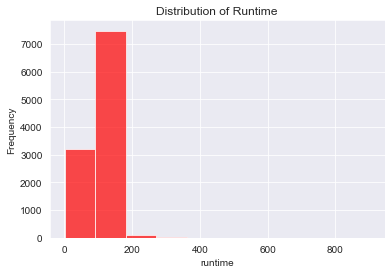

In [44]:
ax = df['runtime'].plot(kind='hist', title = 'Distribution of Runtime', color = 'r', alpha=0.7)
ax.set_xlabel('runtime')

Most movies have runtime above 150 (tallest bar in the middle), few below 150, rarely above 200 (shortest bar).

<a id='conclusions'></a>
## Conclusions
> Question(s) for Analysis again
> + What is the most popular genre?

The most popular genre is adventure, followed by science fiction. This analysis is based on the broad categorization by using the first words in the genre column.

> + What is the Distribution of the runtime across all movies?

Most movies have runtime above 150, few below 150, rarely above 200.

> + What is the Relationship between vote count and popularity?

There is a positive linear relationship between popularity and vote count, as depicted on the plot. That means the more popular a movie is, the higher the vote count.

> + Does popularity contributes to high vote average?

There is no relationship between popularity and vote average, as depicted on the plot.

## Limitations

> The first word in the genres column might not be exact representation of the movie category. Hence, specific options for genres should be created for users to select from.
> More than half of the dataset has no information on revenue, revenue adjustment, budget, budget adjustment. This actually limited analysis on movie budgets and revenues.

## Reference
> Not applicable